# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Importing the dataset for Forest Fire Prediction

About the Dataset: "Forest Fires Data Set" from UCI (University of California, Irvine) Machine Learning Repository Center for Machine Learning and Intelligent Systems, is the most popular dataset used for forest fire prediction. This dataset is developed by P. Cortez and A. Morais in 2007 for their research paper on A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.

In [2]:
data_set = pd.read_csv(r"D:\Chandigarh University\Current Sem\Minor Project\Researh\Dataset\forestfires.csv")

# Performing basis analysis on the Dataset

In [3]:
data_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data_set.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

Description about Attributes:

- 'X', 'Y' = These are the coordinates of the area where fire occur during the observations of Cortez and Morais.
- 'month', 'day' = These specify the activity of fire in specify month and day
- 'FFMC' = FFMC stands for Fine Fuel Moisture Code. This code specifies the moisture content on the surface layer of the forest. The surface layer of the forest drives the initial begining of the fire.
- 'DMC' = DMC stands for Duff Moisture Code. This code specifies the moisture content of the soil 2-10 cm inside the surface. The continuity of the fire depends of the fuel present in Duff layer.
- 'DC' = DC stands for Drought Code. This code specifes the moisture content of the deep soil which is 10+ cm from the surface. The build up or the intensity of the fire depends on the deep soil.
- 'ISI' = ISI stands for Initial Spread Index. This value is derived based on FFMC and wind speed. This index specifies the rate spread of initial fire.
- 'temp' = This attribute tells us about the Temperature of the day when the fire occured. It is measure is celsius.
- 'RH' = RH stands for relative humidity. This specifies the amount of water vapour present in the air. Relative Humdity effects the spreading of the fire.
- 'wind' = This attribute tells us about the wind speed. Fire is driven by wind, so it is crutial to know about the wind. It is measures in km/h.
- 'rain' = This attribute tells us about the 24-hr precipitation. It is measures in mm/m2.
- 'area' = This attribute tells us about the amount of area burned. It is measured in hectare.

In [5]:
print(f"The dimensions of our dataset is {data_set.shape}")

The dimensions of our dataset is (517, 13)


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


From the above information, we can see that month, day are the attributes which are of type object and rest all are numerical.

In [7]:
# Separating numerical and categorical attributes
categorical_attributes = ['month', 'day']
numerical_attributes =[x for x in list(data_set.columns) if x not in categorical_attributes]

In [8]:
data_set.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


From the above statistics, we can see that mean, standard deviation, minimum, maximum, quartiles of each numerical attributes. And we can also see that all attributes are in correct ranges and there is no abnormal deviations.

# Data Preprocessing

DATA CLEANING

In [9]:
round((data_set.isna().sum()/data_set.shape[0]), 5)

X        0.0
Y        0.0
month    0.0
day      0.0
FFMC     0.0
DMC      0.0
DC       0.0
ISI      0.0
temp     0.0
RH       0.0
wind     0.0
rain     0.0
area     0.0
dtype: float64

From above, we can see that our dataset is free of null values.

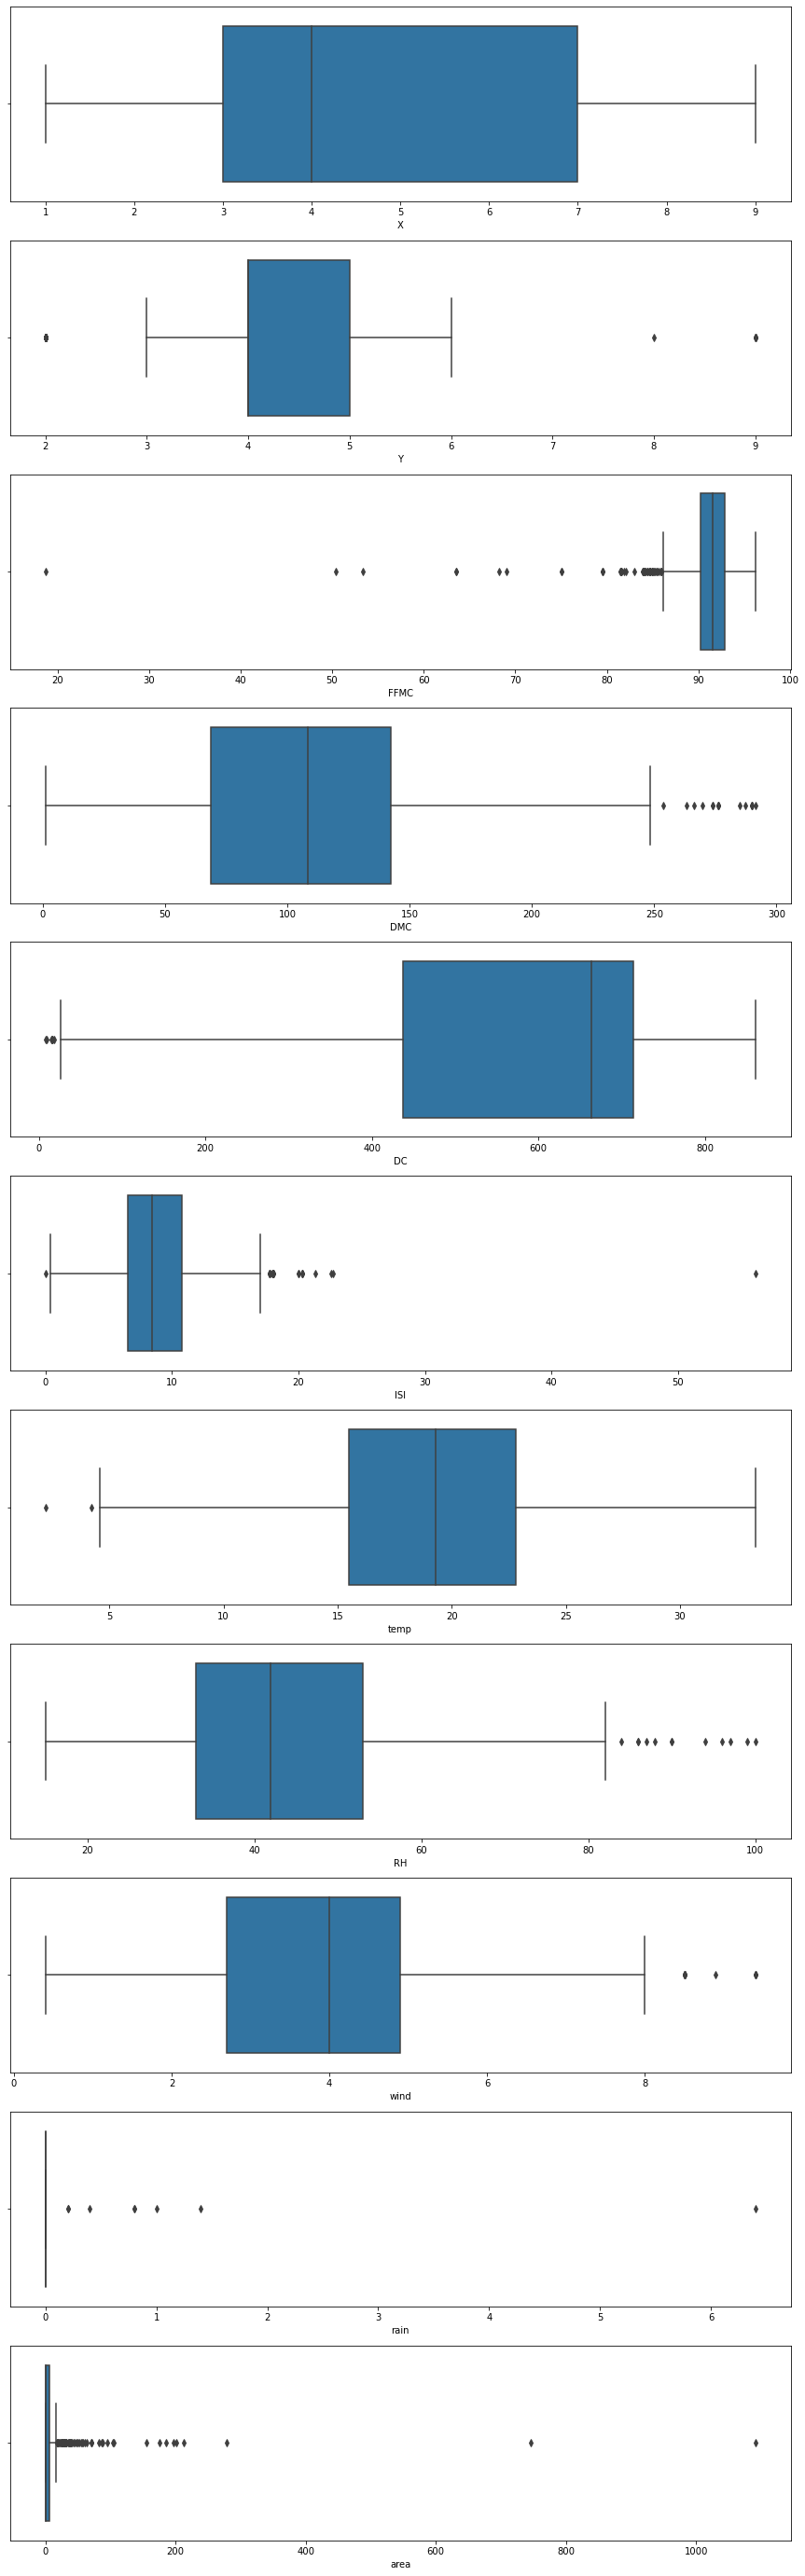

In [10]:
subplot_rows, subplot_columns = len(numerical_attributes), 1
plt.figure(figsize=(15, 50))
for i in range(subplot_rows):
    plt.subplot(subplot_rows, 1, i+1)
    sns.boxplot(data = data_set, x = numerical_attributes[i])
    plt.xlabel(numerical_attributes[i])

From the above visualizations, we can see the outliers and attributes FFMC, DMC, RH, Area have significant number of outliers. But, as we are talking about environmental parameters, they are unpredictible. So, we will explore these attribute in more detail.

As our aim for the project is to predict whether forest fire will occur or not, attributes 'X' and 'Y' are not required. So, we will drop them.

In [11]:
data_set.drop(["X", "Y"], axis=1, inplace=True)

<AxesSubplot:xlabel='month', ylabel='count'>

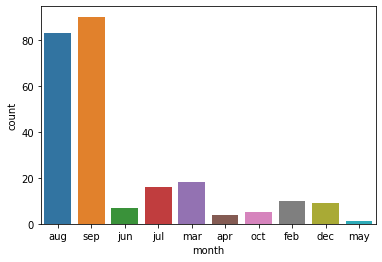

In [12]:
sns.countplot(data = data_set[data_set["area"] > 1], x = "month")

In the above, visualization, we are plotting frequency of months where the fire burned more than 1 hectare of land.  We can see that most of the occurences are in august and september months. Which are month in the fire season in Montesinho natural park, Portugal. So, we will convert the categorical values into numerical based on the frequency occurance in each month. 

In [13]:
for i in data_set["month"].unique():
    data_set["month"].replace(i, len(data_set.loc[(data_set["area"] > 1) & (data_set["month"] == i)]), inplace=True)

<AxesSubplot:xlabel='day', ylabel='count'>

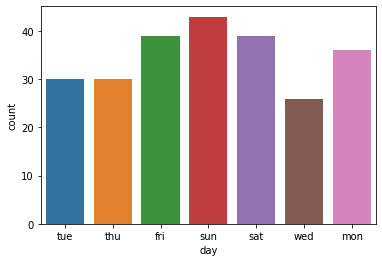

In [14]:
sns.countplot(data=data_set[data_set["area"] > 1], x = "day")

From above, we can see that sunday has more occurences of fire events followed by friday and saturday. So, we will convert categorical to numerical based on the frequency of occurences.

In [15]:
for i in data_set["day"].unique():
    data_set["day"].replace(i, len(data_set.loc[(data_set["area"] > 1) & (data_set["day"] == i)]), inplace=True)

In [16]:
data_set.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,18,39,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,5,30,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,5,39,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,18,39,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,18,43,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


So, we can see that now all the attributes are numerical.

According to Canadian Forest Fire Danger Rating System, FFMC, DMC, DC, ISI can be discritized into different ranges. So, we will discritize these attributes.

In [17]:
data_set["FFMC"] = data_set["FFMC"].apply(lambda x: 0 if x < 77 else 1 if x > 76 and x < 85 else 2 if x > 84 and x < 92 else 3 if x > 91 else x )
data_set["DMC"] = data_set["DMC"].apply(lambda x: 0 if x < 22 else 1 if x > 21 and x < 28 else 2 if x > 27 and x < 41 else 3 if x > 41 and x < 61 else 4 if x > 60 else x)
data_set["DC"] = data_set["DC"].apply(lambda x: 0 if x < 80 else 1 if x > 79 and x < 190 else 2 if x > 190 and x < 300 else 3 if x > 299 and x < 425 else 4 if x > 424 else x)
data_set["ISI"] = data_set["ISI"].apply(lambda x: 0 if x < 1.6 else 1 if x > 1.5 and x < 4.1 else 2 if x > 4 and x < 8.1 else 3 if x > 8 and x < 16 else 4 if x > 15 else x)
data_set["area"] = data_set["area"].apply(lambda x: 1 if x > 0.5 else  0)

Information Regarding discritization
- FFMC: 0-76 -> Low, 77-84 -> Moderate, 85-91->Very High, 92+ -> Extreme
- DMC: 0-21 -> Low, 22-27 -> Moderate, 28-40 -> High, 41-60 -> Very High, 61+ -> Extreme
- DC: 0-79 -> Low, 80-189 -> Moderate, 190-299 -> High, 425+ -> Extreme
- ISI: < 1.5 -> Low, 1.5-4 -> Moderate, 4.1-8 -> High, 8.1-15 -> Very High, >15 -> Extreme
- area: < 1 -> 0, > 1 -> 1
Note: As our project is to predict whether a significant forest fire will occur or not, so, will consider fire occurences in the dataset which are less than 1 hectare as 0 or false and above or equal to 1 hectare as 1 or true.

In [18]:
print(data_set[data_set["DMC"] == 0])

     month  day  FFMC  DMC  DC  ISI  temp   RH  wind  rain  area
58      10   36     1    0   0    1  13.9   40   5.4   0.0     0
59      10   39     2    0   0    2  12.3   51   0.9   0.0     0
75      10   30     1    0   0    2   6.7   79   3.1   0.0     0
76      10   39     2    0   0    2  15.7   43   3.1   0.0     0
96      10   39     1    0   0    1  12.7   48   1.8   0.0     0
97      18   39     0    0   0    0  17.4   24   5.4   0.0     0
104      0   39     1    0   0    1   5.3   78   3.1   0.0     0
105     18   39     2    0   0    1  12.7   52   6.3   0.0     0
110     18   39     2    0   0    1  13.7   43   5.8   0.0     0
130     10   39     0    0   1    0  15.4   40   2.7   0.0     0
165     18   30     1    0   0    1   5.3   70   4.5   0.0     1
176      4   30     1    0   0    1   5.8   54   5.8   0.0     1
182     10   43     2    0   0    1  12.4   53   2.2   0.0     1
196      4   30     1    0   0    1   5.8   54   5.8   0.0     1
202     10   43     1    

In [19]:
data_set.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,18,39,2,1,1,2,8.2,51,6.7,0.0,0
1,5,30,2,2,4,2,18.0,33,0.9,0.0,0
2,5,39,2,3,4,2,14.6,33,1.3,0.0,0
3,18,39,2,2,0,3,8.3,97,4.0,0.2,0
4,18,43,2,3,1,3,11.4,99,1.8,0.0,0


So, by now, we have completed the cleaning, structuring, formating and discritizing our data. Now, we will perform Exploratory Data Analysis on the dataset to get full insight of our dataset.

<AxesSubplot:xlabel='area', ylabel='count'>

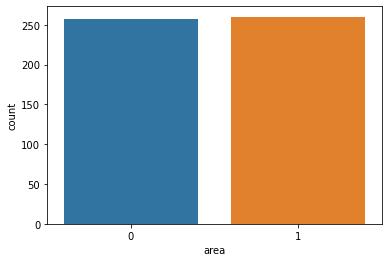

In [20]:
sns.countplot(data=data_set, x="area")

From the above visualization, we can see that our dataset is imbalanced and more biased towards not occuring of fire.

<AxesSubplot:>

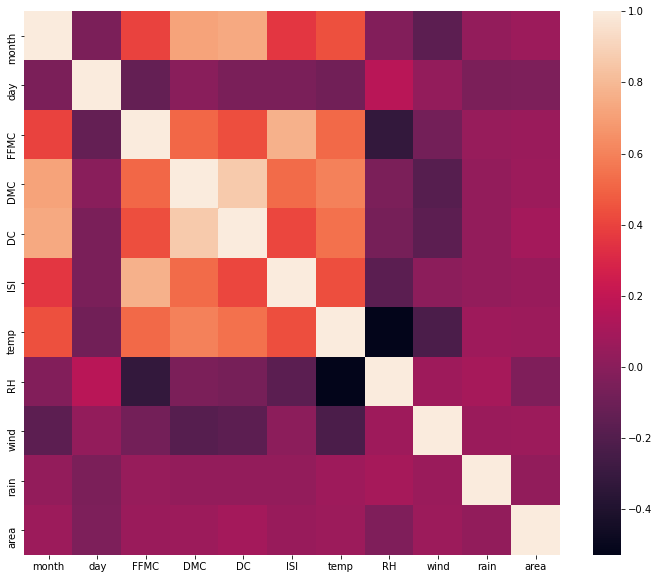

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_set.corr())

From the above heat map analysis, we can see that there is no direct correlation between area (our target attribute) and other attributes. But, attributes month,FFMC, DMC, DC, ISI and temp are closely correlated.

As "day" attribute is not at all correlated with other, we will drop it. And also, "RH", "wind" and "rain" are not correlated but, we have taken the account of Relative humidity, wind and rain in FFMC, DMC, DC and ISI. So, we will drop them also.

In [22]:
data_set.drop(["day", "month"], axis=1, inplace=True)

In [23]:
data_set.drop(["RH", "wind", "rain"], axis=1, inplace=True)

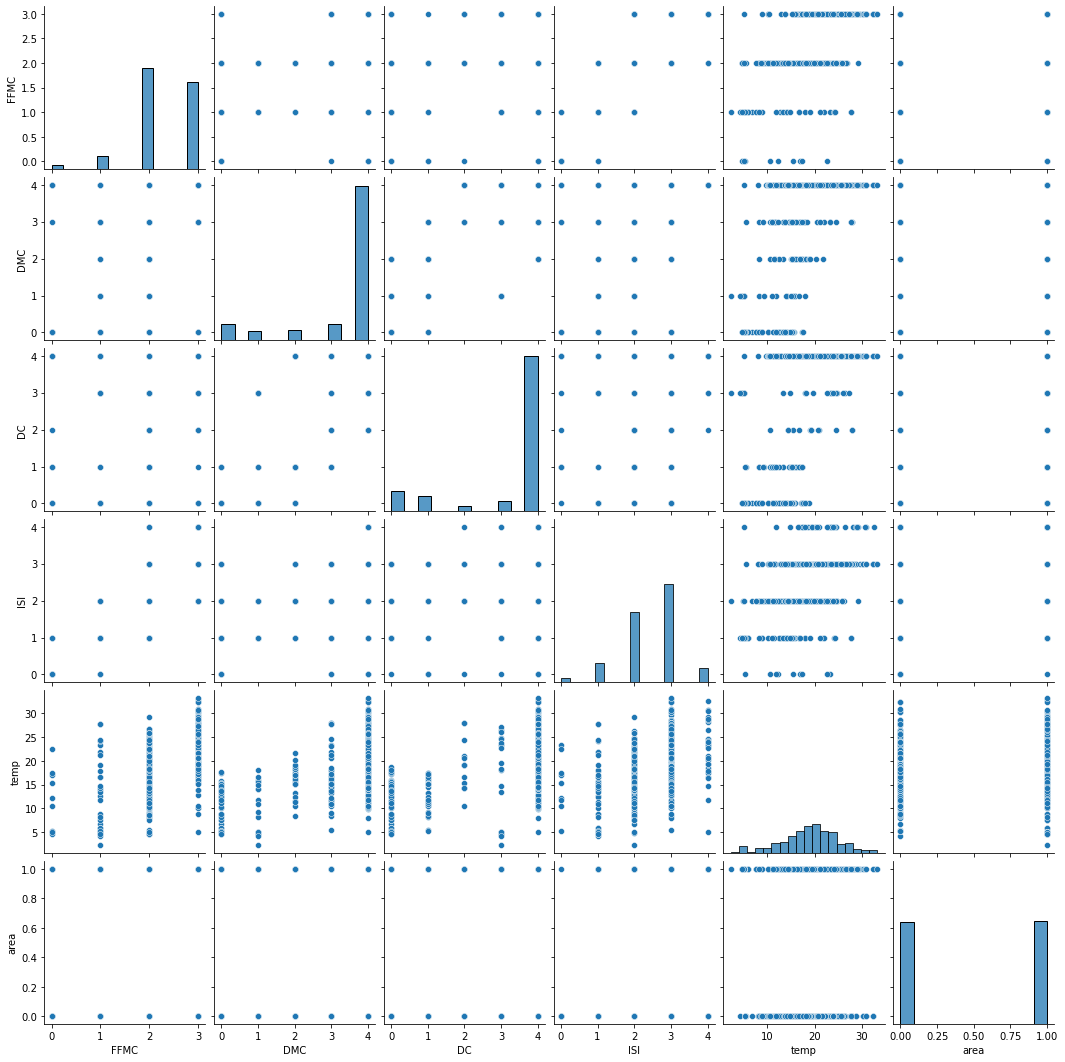

In [24]:
sns.pairplot(data_set)

From the above visualization, we can conclude that there is no direct pattern among these attributes. That is a good thing because this is how environment works. It is unpredictible. But, we need to learn the threshold or tippining conditions, after which the fire starts. By now, we have do with the preprocessing and exploratory data analysis. Now, we will build the machine learning model. According to the dataset, we have decided it is best to us Random Forest Classifier as we need to learn the rules or the tipping points.

# Machine Learning Models

In [25]:
# Separating inputs and outputs
X = data_set.iloc[:, :-1]
Y = data_set.iloc[:, -1]

In [26]:
# Splitting dataset into testing and training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=112, shuffle=True)

In [27]:
print(f"The size of Training set is Inputs = {x_train.shape}, and Outputs = {y_train.shape}")
print(f"In {y_train.shape[0]} training examples, {y_train.shape[0] - sum(y_train)} -> Not Forest Fire and {sum(y_train)} -> Forest Fire")

print(f"The size of Testing set is Inputs = {x_test.shape}, and Outputs = {y_test.shape}")
print(f"In {y_test.shape[0]} training examples, {y_test.shape[0] - sum(y_test)} -> Not Forest Fire and {sum(y_test)} -> Forest Fire")

The size of Training set is Inputs = (413, 5), and Outputs = (413,)
In 413 training examples, 203 -> Not Forest Fire and 210 -> Forest Fire
The size of Testing set is Inputs = (104, 5), and Outputs = (104,)
In 104 training examples, 54 -> Not Forest Fire and 50 -> Forest Fire


In [28]:
# Creating an instance of RandomForestClassifier
RF_model = RandomForestClassifier()
# Training the model using training dataset
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
# Predicting the values using test dataset
y_pred_rf = RF_model.predict(x_test)

In [30]:
# Creating an instance of Support Vector Classifier
SVC_model = SVC()
# Training the SVM model using training dataset
SVC_model.fit(x_train, y_train)

SVC()

In [31]:
# Predicting the values using test dataset
y_pred_svm = SVC_model.predict(x_test)

In [32]:
# Creating an instance of Naive Bayes model
NB_model = GaussianNB()
# Training the model using training data
NB_model.fit(x_train, y_train)

GaussianNB()

In [33]:
# Predicting the values using test dataset
y_pred_nb = NB_model.predict(x_test)

# Models Evaluation

In [34]:
# Evaluating the performance of Random Forest Model
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
[[32 22]
 [20 30]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.60        54
           1       0.58      0.60      0.59        50

    accuracy                           0.60       104
   macro avg       0.60      0.60      0.60       104
weighted avg       0.60      0.60      0.60       104



In [35]:
# Evaluating the performance of SVM
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine
[[30 24]
 [21 29]]
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        54
           1       0.55      0.58      0.56        50

    accuracy                           0.57       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.57      0.57      0.57       104



In [36]:
# Evaluating the performance of the Naive Bayes model
print("Naive Bayes Model")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model
[[16 38]
 [11 39]]
              precision    recall  f1-score   support

           0       0.59      0.30      0.40        54
           1       0.51      0.78      0.61        50

    accuracy                           0.53       104
   macro avg       0.55      0.54      0.50       104
weighted avg       0.55      0.53      0.50       104



We are getting an accuracy of 60% using Random Forest, 57 % using SVM and 53 % using Naive Bayes. Random Forest performs better than all other models. But 60 % accuracy is not a great accuracy but we need to keep in mind that this is weather data. And we know that weather is one of the most unpredictable thing. We can improve the accuracy of the model if we have more data/